# Creators

Marius Böcking (8187719) and Jascha Grewe (7853133)

# Import and Seperation of Dataset

Import all nessasarry files and libraries

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


The File 'breast-cancer-wisconsin.data' will be opened and stored to the variable x. Afterwards the file will be splitted at the end of every row.

Each row includes ten variables. These attributes represent the following information:

    1. Clump Thickness               1 - 10
    2. Uniformity of Cell Size       1 - 10
    3. Uniformity of Cell Shape      1 - 10
    4. Marginal Adhesion             1 - 10
    5. Single Epithelial Cell Size   1 - 10
    6. Bare Nuclei                   1 - 10
    7. Bland Chromatin               1 - 10
    8. Normal Nucleoli               1 - 10
    9. Mitoses                       1 - 10
    10. Class:                       (2 for benign, 4 for malignant)


The file has 683 instances.

In [2]:
with open("cancer/breast-cancer-wisconsin.data") as myfile:
    x=myfile.read().split("\n")
x

['5,1,1,1,2,1,3,1,1,2',
 '5,4,4,5,7,10,3,2,1,2',
 '3,1,1,1,2,2,3,1,1,2',
 '6,8,8,1,3,4,3,7,1,2',
 '4,1,1,3,2,1,3,1,1,2',
 '8,10,10,8,7,10,9,7,1,4',
 '1,1,1,1,2,10,3,1,1,2',
 '2,1,2,1,2,1,3,1,1,2',
 '2,1,1,1,2,1,1,1,5,2',
 '4,2,1,1,2,1,2,1,1,2',
 '1,1,1,1,1,1,3,1,1,2',
 '2,1,1,1,2,1,2,1,1,2',
 '5,3,3,3,2,3,4,4,1,4',
 '1,1,1,1,2,3,3,1,1,2',
 '8,7,5,10,7,9,5,5,4,4',
 '7,4,6,4,6,1,4,3,1,4',
 '4,1,1,1,2,1,2,1,1,2',
 '4,1,1,1,2,1,3,1,1,2',
 '10,7,7,6,4,10,4,1,2,4',
 '6,1,1,1,2,1,3,1,1,2',
 '7,3,2,10,5,10,5,4,4,4',
 '10,5,5,3,6,7,7,10,1,4',
 '3,1,1,1,2,1,2,1,1,2',
 '1,1,1,1,2,1,3,1,1,2',
 '5,2,3,4,2,7,3,6,1,4',
 '3,2,1,1,1,1,2,1,1,2',
 '5,1,1,1,2,1,2,1,1,2',
 '2,1,1,1,2,1,2,1,1,2',
 '1,1,3,1,2,1,1,1,1,2',
 '3,1,1,1,1,1,2,1,1,2',
 '2,1,1,1,2,1,3,1,1,2',
 '10,7,7,3,8,5,7,4,3,4',
 '2,1,1,2,2,1,3,1,1,2',
 '3,1,2,1,2,1,2,1,1,2',
 '2,1,1,1,2,1,2,1,1,2',
 '10,10,10,8,6,1,8,9,1,4',
 '6,2,1,1,1,1,7,1,1,2',
 '5,4,4,9,2,10,5,6,1,4',
 '2,5,3,3,6,7,7,5,1,4',
 '10,4,3,1,3,3,6,5,2,4',
 '6,10,10,2,8,10,7,3,3

Declaring the two arrays 'testdata' and 'traindata'.

In [3]:
testdata=[]
traindata=[]

The 683 instances of the dataset will now be splitted into traindata and testdata. We implemented a for-loop, to put about 90% into the traindata and the remaining instances to the testdata. Therefore we used the 'np.random.random' function, to achieve a random allocation. 

In [4]:
for bob in x:
    if (np.random.random()>=0.9):
        testdata.append(bob)
    else:
        traindata.append(bob)

Show the created traindata

In [5]:
traindata

['5,1,1,1,2,1,3,1,1,2',
 '5,4,4,5,7,10,3,2,1,2',
 '3,1,1,1,2,2,3,1,1,2',
 '6,8,8,1,3,4,3,7,1,2',
 '4,1,1,3,2,1,3,1,1,2',
 '8,10,10,8,7,10,9,7,1,4',
 '1,1,1,1,2,10,3,1,1,2',
 '2,1,2,1,2,1,3,1,1,2',
 '2,1,1,1,2,1,1,1,5,2',
 '1,1,1,1,1,1,3,1,1,2',
 '1,1,1,1,2,3,3,1,1,2',
 '8,7,5,10,7,9,5,5,4,4',
 '7,4,6,4,6,1,4,3,1,4',
 '4,1,1,1,2,1,3,1,1,2',
 '10,7,7,6,4,10,4,1,2,4',
 '6,1,1,1,2,1,3,1,1,2',
 '7,3,2,10,5,10,5,4,4,4',
 '10,5,5,3,6,7,7,10,1,4',
 '3,1,1,1,2,1,2,1,1,2',
 '1,1,1,1,2,1,3,1,1,2',
 '5,2,3,4,2,7,3,6,1,4',
 '3,2,1,1,1,1,2,1,1,2',
 '5,1,1,1,2,1,2,1,1,2',
 '2,1,1,1,2,1,2,1,1,2',
 '1,1,3,1,2,1,1,1,1,2',
 '3,1,1,1,1,1,2,1,1,2',
 '2,1,1,1,2,1,3,1,1,2',
 '10,7,7,3,8,5,7,4,3,4',
 '2,1,1,2,2,1,3,1,1,2',
 '3,1,2,1,2,1,2,1,1,2',
 '2,1,1,1,2,1,2,1,1,2',
 '10,10,10,8,6,1,8,9,1,4',
 '6,2,1,1,1,1,7,1,1,2',
 '2,5,3,3,6,7,7,5,1,4',
 '10,4,3,1,3,3,6,5,2,4',
 '6,10,10,2,8,10,7,3,3,4',
 '5,6,5,6,10,1,3,1,1,4',
 '10,10,10,4,8,1,8,10,1,4',
 '1,1,1,1,2,1,2,1,2,2',
 '3,7,7,4,4,9,4,8,1,4',
 '1,1,1,1,2,1,2

Show the created testdata

In [6]:
testdata

['4,2,1,1,2,1,2,1,1,2',
 '2,1,1,1,2,1,2,1,1,2',
 '5,3,3,3,2,3,4,4,1,4',
 '4,1,1,1,2,1,2,1,1,2',
 '5,4,4,9,2,10,5,6,1,4',
 '5,5,5,8,10,8,7,3,7,4',
 '5,3,1,2,2,1,2,1,1,2',
 '2,1,1,1,3,1,2,1,1,2',
 '2,2,2,1,1,1,7,1,1,2',
 '3,1,1,2,2,1,1,1,1,2',
 '1,1,1,1,2,1,2,3,1,2',
 '4,5,5,10,4,10,7,5,8,4',
 '1,1,1,1,2,1,2,1,1,2',
 '2,1,1,1,2,1,3,1,1,2',
 '3,4,5,2,6,8,4,1,1,4',
 '3,1,1,3,8,1,5,8,1,2',
 '7,2,4,1,6,10,5,4,3,4',
 '10,7,7,4,5,10,5,7,2,4',
 '4,1,1,1,2,2,3,2,1,2',
 '5,10,10,3,8,1,5,10,3,4',
 '5,1,1,4,2,1,3,1,1,2',
 '10,8,8,4,10,10,8,1,1,4',
 '1,1,1,1,1,1,3,1,1,2',
 '8,9,9,5,3,5,7,7,1,4',
 '7,4,7,4,3,7,7,6,1,4',
 '6,8,7,5,6,8,8,9,2,4',
 '10,8,8,2,8,10,4,8,10,4',
 '10,4,4,10,2,10,5,3,3,4',
 '3,1,1,1,2,1,1,1,1,2',
 '7,4,5,10,2,10,3,8,2,4',
 '8,10,10,10,8,10,10,7,3,4',
 '5,3,4,3,4,5,4,7,1,2',
 '1,1,1,1,2,1,3,1,1,2',
 '6,8,7,8,6,8,8,9,1,4',
 '4,4,4,4,6,5,7,3,1,2',
 '7,6,3,2,5,10,7,4,6,4',
 '10,1,1,1,2,10,5,4,1,4',
 '5,1,1,1,2,1,3,1,2,2',
 '1,1,1,1,2,1,3,1,1,2',
 '1,1,1,1,1,1,2,1,1,2',
 '1,1,1,1,2

The traindata are written in the cancer_train.csv. Each row will be seperated with a line break (\n).

In [7]:
cancer_training = open ("cancer/cancer_train.csv", "w")
for row in traindata:
    cancer_training.write(row)
    cancer_training.write("\n")
cancer_training.close()

The testdata are written in the cancer_test.csv. Each row will be seperated with a line break (\n).

In [8]:
cancer_test = open ("cancer/cancer_test.csv", "w")
for row in testdata:
    cancer_test.write(row)
    cancer_test.write("\n")
    
cancer_test.close()

This step are used to cut the last row in the cancer_train.csv, to avoid the "pop from empty list" error message.

In [9]:
inputs = open("cancer/cancer_train.csv")
all_lines = inputs.readlines()
all_lines.pop(len(all_lines)-1)  # removes last line
inputs.close()  # closes file

# truncate file and write all lines except the last line
with open("cancer/cancer_train.csv", "w") as out:
    for line in all_lines:
        out.write(line.strip() + "\n")

This step are used to cut the last row in the cancer_test.csv, to avoid the "pop from empty list" error message.

In [10]:
inputs = open("cancer/cancer_test.csv")
all_lines = inputs.readlines()
all_lines.pop(len(all_lines)-1)  # removes last line
inputs.close()  # closes file

# truncate file and write all lines except the last line
with open("cancer/cancer_test.csv", "w") as out:
    for line in all_lines:
        out.write(line.strip() + "\n")

# Scatter-Plot

The datatsets from both .csv-Files will now be load without a header and the target and feature types are set as an Integer.

In [11]:
# Load datasets.
training_set = tf.contrib.learn.datasets.base.load_csv_without_header(
    filename="cancer/cancer_train.csv",
    target_dtype=np.int,
    features_dtype=np.int)

test_set = tf.contrib.learn.datasets.base.load_csv_without_header(
    filename="cancer/cancer_test.csv",
    target_dtype=np.int,
    features_dtype=np.int)

Define the training inputs. 

In [12]:
def get_train_inputs():
    x = tf.constant(training_set.data)
    y = tf.constant(training_set.target)
    #  y = tf.summary.scalar(, training_set.target)
    return x, y

Define the test inputs.

In [13]:
def get_test_inputs():
    x = tf.constant(test_set.data)
    y = tf.constant(test_set.target)
    return x, y

Now we will create a Dictionary to match between the classification (2=benign or 4=malignant) and the colors 'green' and 'red'. This is necessary for the following Scatter-Plot.

In [14]:
ColorDict={2:"green", 4:"red"}

Here we are 

In [15]:
colors = []
for target in training_set.target:
    colors.append(ColorDict[target])

dataX is set to all rows in the first column of training_set.data.

In [16]:
dataX = training_set.data[:,0]

dataY is set to all rows in the ninth column of training_set.data.

In [17]:
dataY = training_set.data[:,8]

A new Scatter-Plot will be created. This Plot will show the previously defined information, which are stored in 'dataX' and 'dataY'. All instances with benign cancer have a green dot. All instances with malignant cancer have a red dot.

It is apparent that most of the benign cancers are arranged at the bottom left corner. The dots representing malignant cancer are mostly at the right side of the graph. 

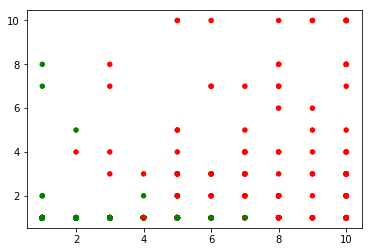

In [18]:
plt.scatter(dataX, dataY, c=colors, s=20) # , cmap=plt.cm.cool)
plt.show()

# Classifier and Learning of Neural Network

Now we specify that all features have real-value data. Dimension is set to nine because there are nine feature-variables.

In [19]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=9)]

Here the classifier will be defined. We use three hidden units with 512, 256 and 128 neurons. 'n_classes' is set to five because the biggest possible target is four (malignant cancer).

In [20]:
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[512, 256, 128],
                                            n_classes=5,
                                            model_dir="/tmp/cancer_model1")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_is_chief': True, '_task_id': 0, '_model_dir': '/tmp/cancer_model1', '_session_config': None, '_keep_checkpoint_max': 5, '_evaluation_master': '', '_save_summary_steps': 100, '_task_type': None, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f54ca0dc978>, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0, '_tf_random_seed': None}


The classifier will be started and the number of steps is set to 3000.

In [21]:
classifier.fit(input_fn=get_train_inputs, steps=3000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/cancer_model1/model.ckpt.
INFO:tensorflow:step = 1, loss = 1.61687
INFO:tensorflow:global_step/sec: 43.9275
INFO:tensorflow:step = 101, loss = 0.118076 (2.277 sec)
INFO:tensorflow:global_step/sec: 44.7293
INFO:tensorflow:step = 201, loss = 0.0667818 (2.238 sec)
INFO:tensorflow:global_step/sec: 42.5451
INFO:tensorflow:step = 301, loss = 0.0353013 (2.352 sec)
INFO:tensorflow:global_step/sec: 36.3365
INFO:tensorflow:step = 401, loss = 0.0328832 (2.748 sec)
INFO:tensorflow:global_step/sec: 24.427
INFO:tensorflow:step = 501, loss = 0.0161764 (4.098 sec)
INFO:tensorflow:globa

DNNClassifier(params={'hidden_units': [512, 256, 128], 'input_layer_min_slice_size': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f54ca0dc7f0>, 'feature_columns': (_RealValuedColumn(column_name='', dimension=9, default_value=None, dtype=tf.float32, normalizer=None),), 'dropout': None, 'gradient_clip_norm': None, 'optimizer': None, 'activation_fn': <function relu at 0x7f54dc5a3f28>, 'embedding_lr_multipliers': None})

Testing the neuronal network and showing the achieved accuracy score.

In [22]:
accuracy_score = classifier.evaluate(input_fn=get_test_inputs, steps=1)["accuracy"]
print("\nTest Accuracy: {0:.1f}%\n".format(100*accuracy_score))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-08-02-13:43:22
INFO:tensorflow:Restoring parameters from /tmp/cancer_model1/model.ckpt-3000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-08-02-13:43:22
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.934211, global_step = 3000, loss = 0.287462

Test Accuracy: 93.4%



Classify a new cancer sample.

In [23]:
def new_samples():
    return np.array(
    [[4, 2, 1, 1, 2, 1, 2, 1, 1]], dtype=np.float32)

Test this sample. If the output is '2', the neuronal network estimates a benign cancer. If the output is '4', the neuronal network estimates a malignant cancer.

In [24]:
predictions = list(classifier.predict_classes(input_fn=new_samples))
predictions

INFO:tensorflow:Restoring parameters from /tmp/cancer_model1/model.ckpt-3000


[2]

The following Scatter-Plot shows the position of the new sample with a black 'x'.

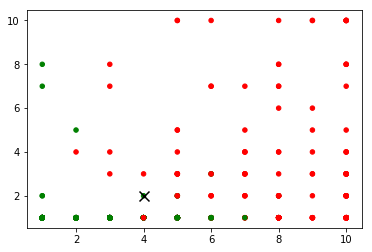

In [25]:
plt.scatter(dataX, dataY, c=colors, s=20)
plt.scatter(new_samples()[0,0], new_samples()[0,1], c=["black"], marker="x", s=100)
plt.show()

# Loss Graph

Use these instructions to get a graph of the of course of the Loss-value while training the neuronal network.

1. Open a new Terminal
2. Type: 'tensorboard --logdir=/tmp/cancer_model1'
3. Open Firefox and go to: 'http://localhost:6006'
4. Click on 'loss'

In this Graph is apparent that the neuronal network learns fast and after 1500 steps the Loss-Value is close to zero. The Loss-Value keeps small and does not increase again after more steps.